# Анализ датасета Netflix

Проанализируем датасет, содержащий список **всех** фильмов и ТВ-шоу, доступных на Netflix.

Что хотим понять?
1. Особенности контента в разных странах. Где больше всего снимают материала?
2. Что более популярно - ТВ-шоу или фильмы?
3. Какова средняя продолжительность фильмов? Какой Разброс?
4. Какие жанры фильмов наиболее популярны?
5. Какой топ самых часто встречаемых актеров?
6. Какие режиссеры наиболее популярны?



Именно на эти вопросы и будем отвечать (в неопределенном порядке).

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
df = pd.read_csv("Data/netflix_titles.csv")

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Топ-10 стран, на счету которых наибольшее количество отснятого материала
Посмотрим на список из топ-10 стран с самым больший количеством фильмов/сериалов. Для наглядности проиллюстрируем топ графиком, а также узнаем процентное соотношение.

In [16]:
top_10 = df['country'].value_counts().index[0:10]
top_10

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt'],
      dtype='object')

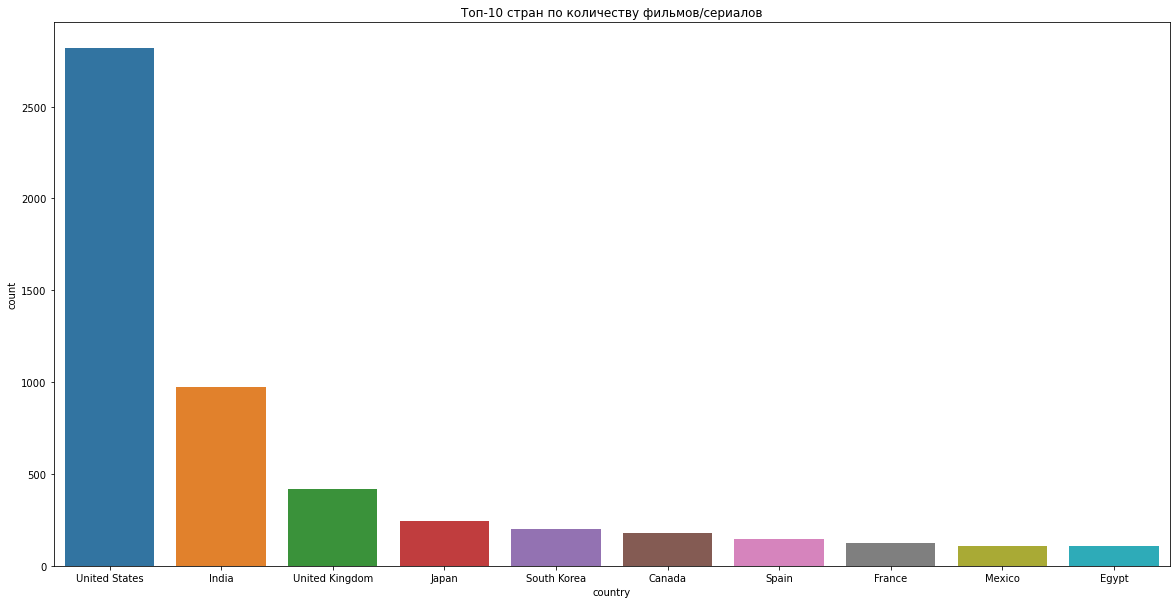

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x=df['country'], order=top_10)
plt.title('Топ-10 стран по количеству фильмов/сериалов') ; 

In [18]:
usa_percentage = 100.0 * len(df[df['country'] == 'United States']) / len(df)
print("usa_percentage =", usa_percentage, '%')
india_percentage = 100.0 * len(df[df['country'] == 'India']) / len(df)
print("india_percentage =", india_percentage, '%')
uk_percentage = 100.0 * len(df[df['country'] == 'United Kingdom']) / len(df)
print("uk_percentage =", uk_percentage, '%')

usa_percentage = 31.99727489496991 %
india_percentage = 11.036675371863291 %
uk_percentage = 4.757579198364937 %


Как мы видим, больше всего для стримингово сервиса снято в США (~32% всего мирового материала),что закономерно, учитывая происхождение Нетфликс. Довольно интересно, что на втором месте идет Индия c 11% всего контента (в дальнейшем мы еще не раз увидим эту страну в результатах анализ, что не случайно, ведь Индия - второй по величине рынок для Нетфлткс). Третье место у Великобритании, хотя отрыв от Индии уже довольно велик, на соединенное королевство приходится всего ~5% от обшей доли

**Также интересно посмотреть зависимость количества добавляемого на Netflix контента от времени:**
Мы обратим внимание сразу и на фильмы, и на тв-шоу, чтобы проследить, в какие годы какой вид контента был популярнее

<AxesSubplot:xlabel='release_year', ylabel='count'>

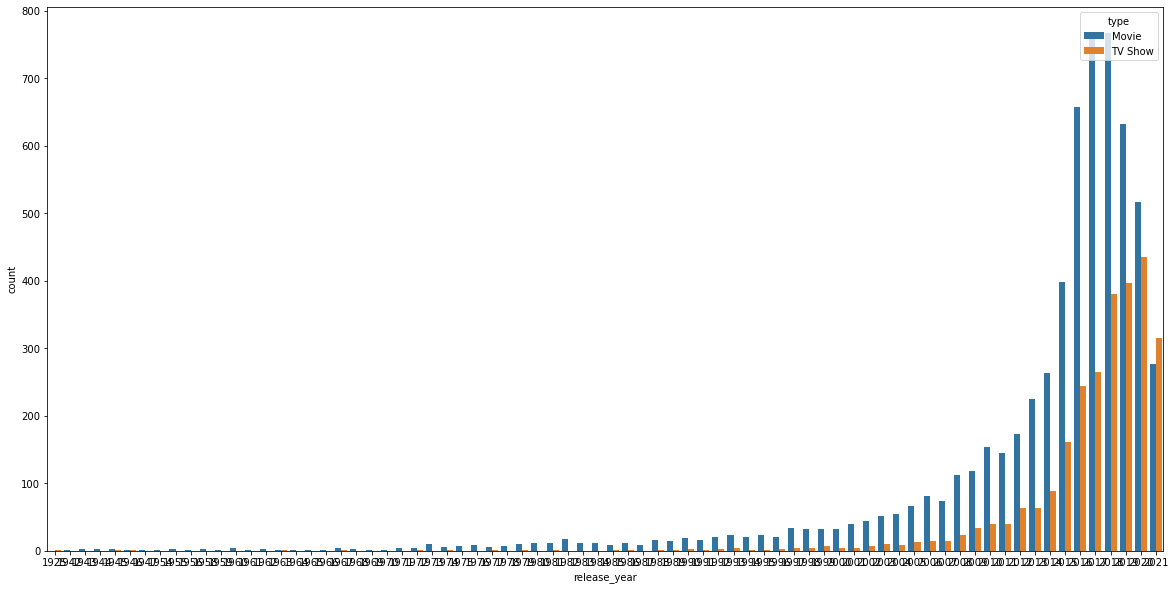

In [19]:
plt.figure(figsize=(20, 10))
sns.countplot(x='release_year', data=df, hue='type')

Однако как и на любом другом стриминговом сервисе на Нетфликс присутствуют не только новинки, поэтому сейчас наш график выглядит не совсем репрезентативно. Сузим выборку и посмотрим, как часто выходили фильмы в последние 20 лет (выборка 2000-2021):

<AxesSubplot:xlabel='release_year', ylabel='count'>

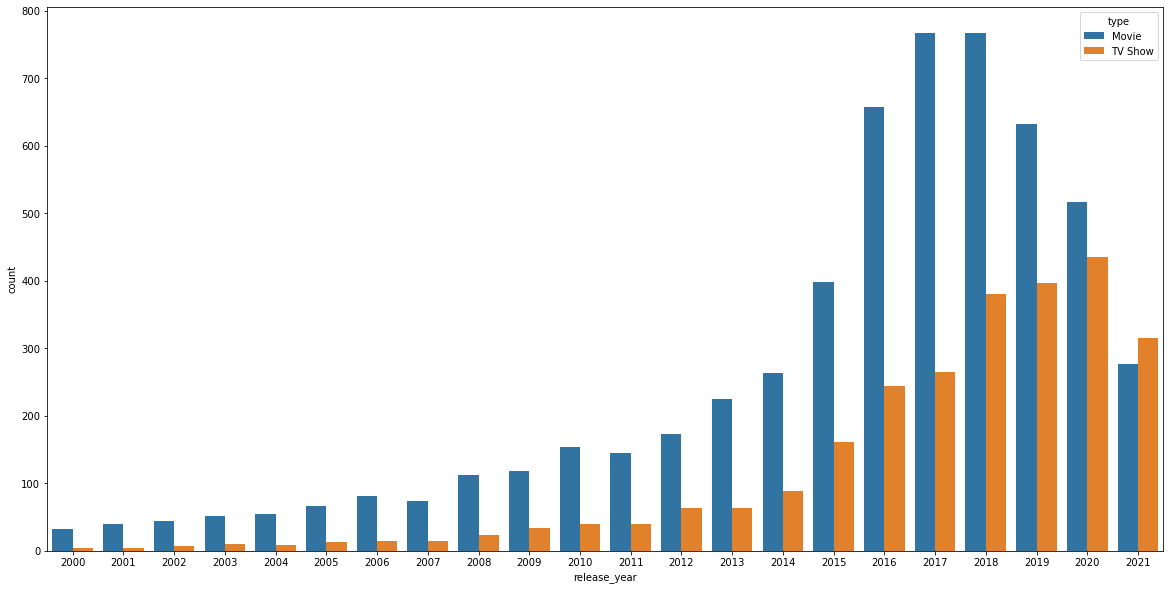

In [20]:
df_2000 = df[df["release_year"] >= 2000]

plt.figure(figsize=(20, 10))
sns.countplot(x='release_year', data=df_2000, hue='type')

**Вывод:** Видно, что количество выпускаемых фильмов в среднем увеличивалось, достигая своего пика в 2017-2018 годах, после чего начало заметное снижение. С ТВ-шоу ситуация похожая - их количество росло до 2020-го года, снизившись в 2021-ом.

### Чего больше, фильмов или ТВ-шоу?

График выше хорошо показывает, что количество фильмов заметно превышает число сериалов. Интересно заметить, что 2021 - первый год, в котором сериалов вышло больше, чем фильмов.

Если говорить более точно в цифрах:

In [21]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Всего фильмов было выпущено 6131, а сериалов 2676. Но чтобы было интереснее, посмотрим процентное соотношение и  изобразим эти данные в виде пирога:

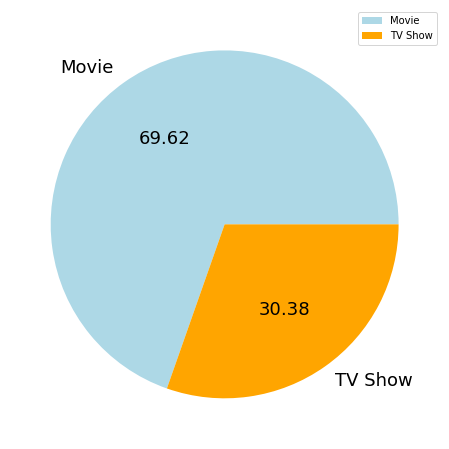

In [22]:
plt.figure(figsize=(10,8))

plt.pie(df['type'].value_counts(),
        labels=df['type'].value_counts().index,
        autopct="%.2f",
        textprops={'fontsize': 18,}, 
        colors=['lightblue','orange' ] )
plt.legend()
plt.show()

**Вывод:** фильмов заметно больше, чем ТВ-шоу (более чем в два раза).

### Какова средняя продолжительность фильмов? 
В данном разделе мы рассмотрим среднюю продолжительность фильмов, узнаем, какой фильм самый короткий и какова наибольшая продолдительность фильма, выпущенного на Нетфликс

In [23]:
import warnings
warnings.filterwarnings("ignore")

df_movies = df[df['type'] != 'TV Show']
df_movies['duration'] = df_movies['duration'].str.replace(' min', '')
df_movies['duration'] = df_movies['duration'].fillna(-1)
df_movies['duration'] = df_movies['duration'].astype(int)
df_movies = df_movies[df_movies['duration'] != -1]

mean_duration = df_movies['duration'].mean()
print("mean duration =", mean_duration)

mean duration = 99.57718668407311


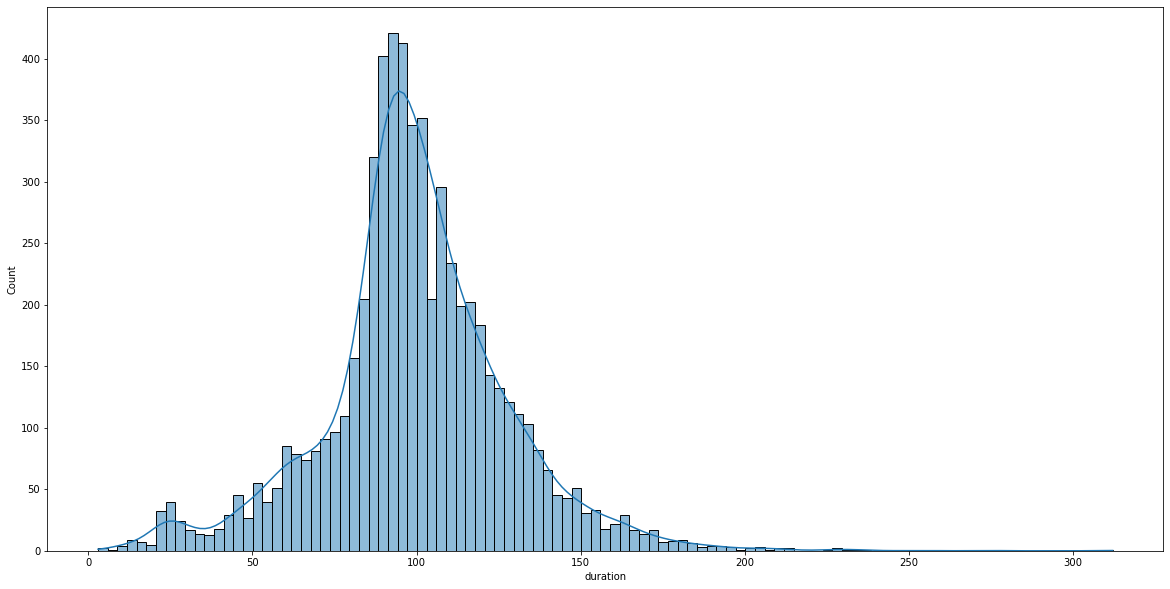

In [24]:
df_movies = df[df['type'] != 'TV Show']
df_movies['duration'] = df_movies['duration'].str.replace(' min', '')
df_movies['duration'] = df_movies['duration'].fillna(-1)
df_movies['duration'] = df_movies['duration'].astype(int)
df_movies = df_movies[df_movies['duration'] != -1]
plt.figure(figsize=(20, 10))
sns.histplot(data=df_movies['duration'], kde=True)

warnings.filterwarnings("default")

In [25]:
min_duration = min(df_movies['duration'])
max_duration = max(df_movies['duration'])
inter = df_movies['duration'].quantile(0.75) - df_movies['duration'].quantile(0.25)

print("min =", min_duration, "max =", max_duration, " diff =", max_duration - min_duration)
print("Interquartile range =", inter)

min = 3 max = 312  diff = 309
Interquartile range = 27.0


**Вывод:** Можно видеть, что продолжительность большинства фильтров сосредоточена в районе 90-100 минут. Хотя некоторые фильмы бывают сильно короче (от 3 минут) и продолжительнее (до 312 минут). Средняя продолжительность составляет примерно 100 минут ($\approx 99,5$ если говорить точнее).

Интерквартильный размах равен 27.

### Какие актеры чаще всего встречаются в фильмах?

Проанализируем, какие актеры чаще всего встречаются в нашем датасете:

In [26]:
actor_count = dict()
actor_country = dict()
for index, row in df.iterrows():
    cast = row['cast']
    country = row['country']
    if isinstance(cast, str):
        cur_actors = cast.split(', ')
        for actor in cur_actors:
            if actor in actor_count:
                actor_count[actor] += 1
            else:
                actor_count[actor] = 1
            
            if actor not in actor_country and isinstance(country, str):
                actor_country[actor] = country

for actor in sorted(actor_count, key=actor_count.get, reverse=True):
    print(actor, actor_count[actor], actor_country[actor])

Anupam Kher 43 India
Shah Rukh Khan 35 India
Julie Tejwani 33 India
Naseeruddin Shah 32 India
Takahiro Sakurai 32 Japan
Rupa Bhimani 31 India
Akshay Kumar 30 India
Om Puri 30 India
Yuki Kaji 29 Japan
Amitabh Bachchan 28 India
Paresh Rawal 28 India
Boman Irani 27 India
Rajesh Kava 26 India
Vincent Tong 26 Hong Kong, Canada, United States
Andrea Libman 25 United States, Canada
Kareena Kapoor 25 India
Samuel L. Jackson 24 United States
John Cleese 24 Spain, United Kingdom, United States
Jigna Bhardwaj 23 India
Fred Tatasciore 23 United States
Tara Strong 23 United States
Daisuke Ono 22 Japan
Junichi Suwabe 21 Japan
Ajay Devgn 21 India
Ashleigh Ball 21 United States, Canada
Kay Kay Menon 21 India
Nicolas Cage 21 Spain
Nawazuddin Siddiqui 21 India
Adam Sandler 20 United States
David Attenborough 20 United States
Salman Khan 20 India
David Spade 19 United States
Yuichi Nakamura 19 Japan
Erin Fitzgerald 19 United States
Mamoru Miyano 19 Japan
Morgan Freeman 19 Germany, United States
James Fra

KeyError: 'Saurav Chakraborty'

Топ 10 популярных актеров:
- Anupam Kher, India
- Shah Rukh Khan, India
- Julie Tejwani, India
- Naseeruddin Shah, India
- Takahiro Sakurai, Japan
- Rupa Bhimani, India
- Akshay Kumar, India
- Om Puri, India
- Yuki Kaji, Japan
- Amitabh Bachchan, India

Как можно заметить, большинство актеров топа из Индии. Посмотрим на топ актеров из разных стран:

In [27]:
def get_sorted_from_country(country):
    global actor_country
    global actor_count
    
    top_list = []
    
    for actor in sorted(actor_count, key=actor_count.get, reverse=True):
        if actor_country.get(actor) == country:
            top_list.append(actor)
    return top_list

country_list = ['United States', 'United Kingdom', 'Japan']
needed_top = 5

for country in country_list:
    print(country)
    print('   ', *get_sorted_from_country(country)[0:needed_top], sep = '\n   ')
    print()


United States
   
   Samuel L. Jackson
   Fred Tatasciore
   Tara Strong
   Adam Sandler
   David Attenborough

United Kingdom
   
   Eric Idle
   Terry Jones
   Graham Chapman
   Terry Gilliam
   Keith Wickham

Japan
   
   Takahiro Sakurai
   Yuki Kaji
   Daisuke Ono
   Junichi Suwabe
   Yuichi Nakamura



Как видим, науиболее популярный актер в фильмах производства США  - Самуэль Дженксон, Великобритании - Эрик Айдл, Японии -Такахиро Сакурай

### Самые популярные режиссеры

In [28]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

Индийский режиссер Rajiv Chilaka снял аж 19 фильмов или ТВ-шоу.

### Какие жанры наиболее популярны?

Попробуем достать информацию о самых популярных жанрах и проиллюстрировать полученную информацию графиком

In [29]:
def get_genres(content_type):
    genres_popularity = dict()
    for index, row in df.iterrows():
        if row['type'] != content_type:
            continue
        listed_in = row['listed_in']
        if not isinstance(listed_in, str):
            continue
        cur_genres = listed_in.split(', ')
        for genre in cur_genres:
            if genre not in genres_popularity:
                genres_popularity[genre] = 0
            genres_popularity[genre] += 1
    top_genres = []
    for x in sorted(genres_popularity, key=genres_popularity.get, reverse=True):
        top_genres.append([x, genres_popularity.get(x)])
    return top_genres

In [30]:
dict_movies = get_genres('Movie')
dict_tvshows = get_genres('TV Show')

Text(0.5, 1.0, 'genres popularity in movies')

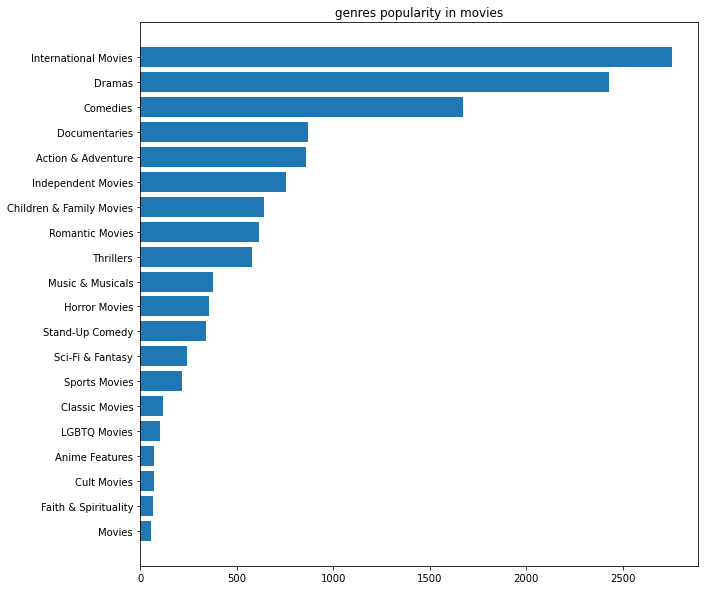

In [31]:
x_movies = []
y_movies = []
for pair in dict_movies:
    x_movies.append(pair[0])
    y_movies.append(pair[1])
x_movies = x_movies[::-1]
y_movies = y_movies[::-1]
plt.figure(figsize=(10, 10))
plt.barh(x_movies, y_movies)
plt.title("genres popularity in movies")

Видно, что среди фильмов самым популярным жанром является драма. После идут комедия, документальные фильмы и "Action & Adventure" - приключенческие фильмы.

Text(0.5, 1.0, 'genres popularity in TV Shows')

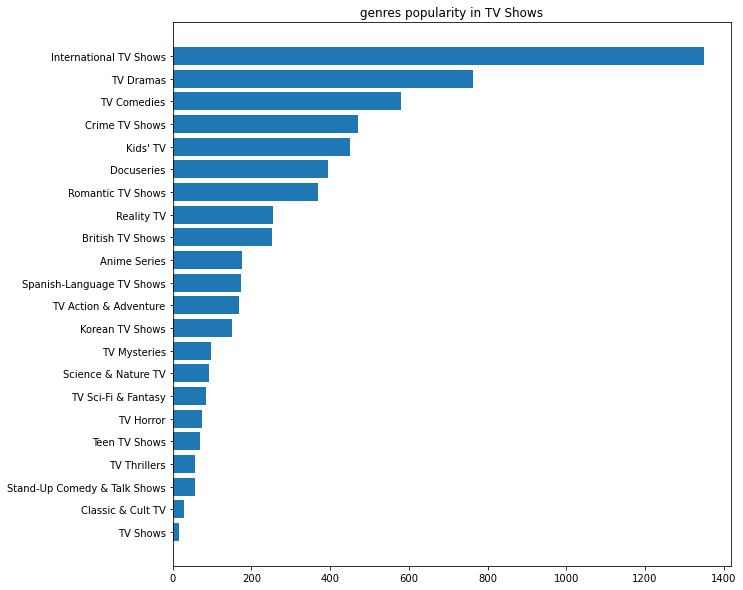

In [32]:
x_tvshows = []
y_tvshows = []
for pair in dict_tvshows:
    x_tvshows.append(pair[0])
    y_tvshows.append(pair[1])
x_tvshows = x_tvshows[::-1]
y_tvshows = y_tvshows[::-1]
plt.figure(figsize=(10, 10))
plt.barh(x_tvshows, y_tvshows)
plt.title("genres popularity in TV Shows")

Среди ТВ-шоу самыми популярными являются: драмы, комедии, "Crime TV Shows" и шоу для детей.

**Вывод:** самым популярным жанром и для фильмов, и для ТВ-шоу является драма, а на втором месте - комедия. 